# Loading Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [2]:
#import and load data from csv file 
data  = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [6]:
# Statistical data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

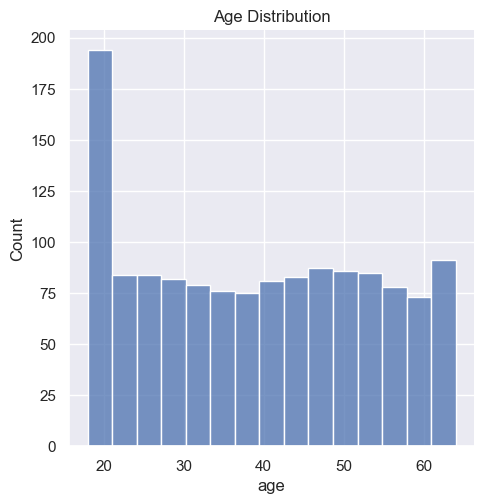

In [7]:
# Distribution of Age column
sns.set()
plt.figure(figsize = (6,6))
sns.displot(data['age'], bins = 15)
plt.title('Age Distribution')
plt.show();

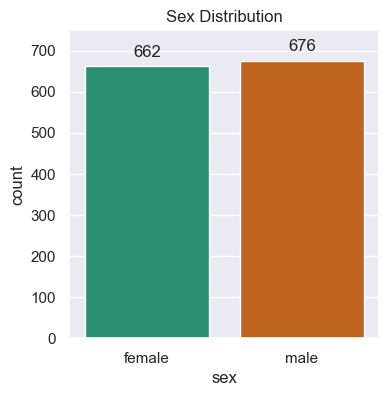

In [8]:
# Gender column
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=data['sex'], hue=data['sex'],palette='Dark2')

# Adding count values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.ylim(0, 750)
plt.title('Sex Distribution')
plt.show()

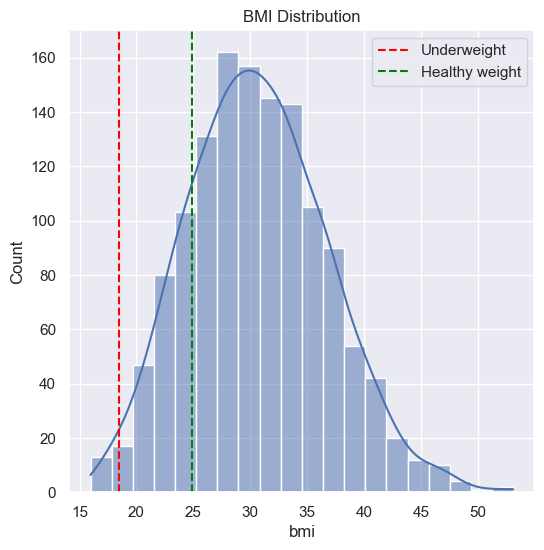

In [9]:

sns.set()
plt.figure(figsize=(6, 6))
sns.histplot(data['bmi'], bins=20, kde=True)  # Set kde=True to add the curve line

# Add vertical lines for normal BMI range
plt.axvline(x=18.5, color='red', linestyle='--', label='Underweight')
plt.axvline(x=24.9, color='green', linestyle='--', label='Healthy weight')

plt.title('BMI Distribution')
plt.legend()
plt.show()

According to the CDC, the normal or healthy BMI ranges between 18.5 and 24.9. Here we can see that the center of the distribution is closer to 30, which suggests that the majority of entries in this data set categorized as overweight or obsesity

Text(0.5, 1.0, 'Children')

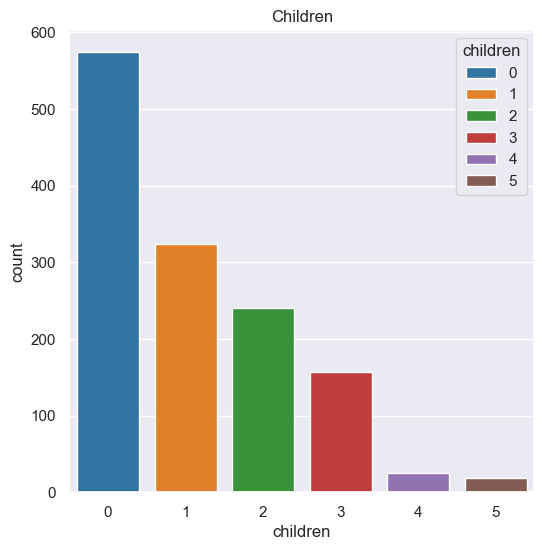

In [21]:
# Childen column
plt.figure(figsize = (6,6))
sns.countplot(x = data['children'], hue = data['children'], palette = "tab10")
plt.title("Children")

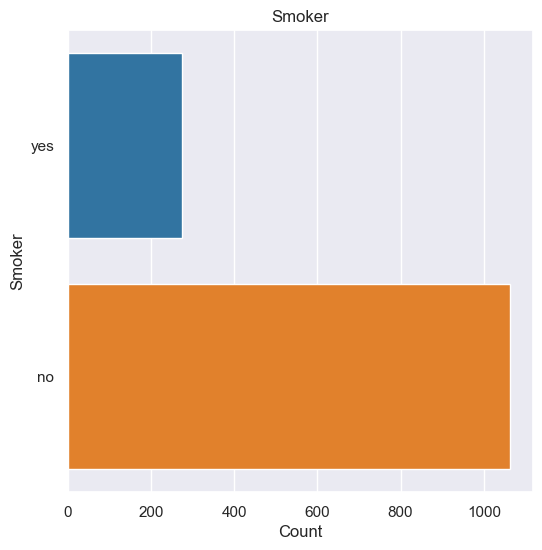

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(y=data['smoker'], hue=data['smoker'], palette="tab10")
plt.title("Smoker")
plt.xlabel("Count")
plt.ylabel("Smoker")
plt.show()


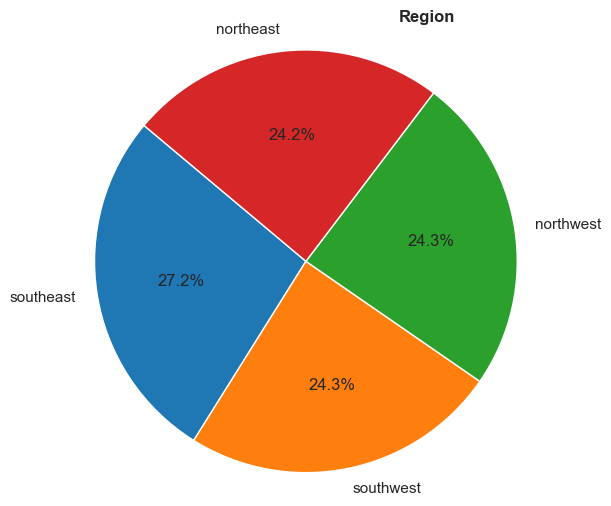

In [40]:
plt.figure(figsize=(6, 6))
data['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('tab10'), startangle=140)
plt.title('Region', loc='left')
plt.ylabel(None)  # Remove the default ylabel
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Get the title object and adjust its position
title = plt.title('Region', loc='left', fontweight = 'bold')
title.set_position([0.7, 0.5])

plt.show()


Text(0.5, 1.0, 'Charges')

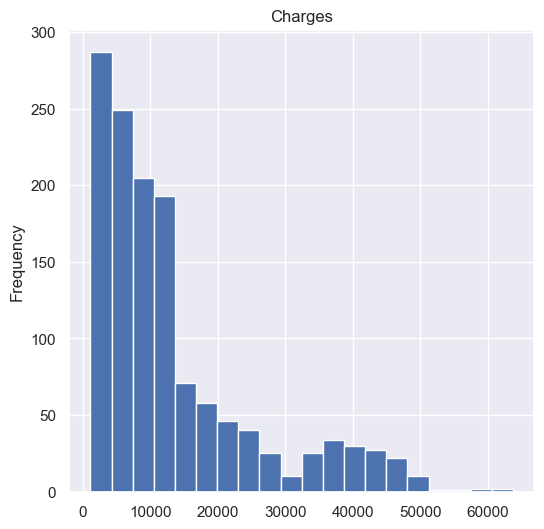

In [49]:
plt.figure(figsize = (6,6))
data['charges'].plot(kind = 'hist', bins  = 20)
plt.title('Charges')

# Converting categorical data to numerical


In [64]:
data['smoker'].value_counts()

smoker
1    1064
0     274
Name: count, dtype: int64

In [63]:
data['sex'].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [59]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [65]:
# encoding sex column
data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True) #replacing male: 1, female: 1
# Encoding smaker column
data.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
#encoding Region column
data.replace({'region': {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# A simple definition of linear regression:

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a straight line to the observed data points. It assumes that this relationship is approximately linear, meaning that changes in the independent variables are associated with a constant change in the dependent variable. Linear regression aims to find the best-fitting line that minimizes the differences between the observed and predicted values of the dependent variable




<img src="Linear.png" width="400" height="300"/>


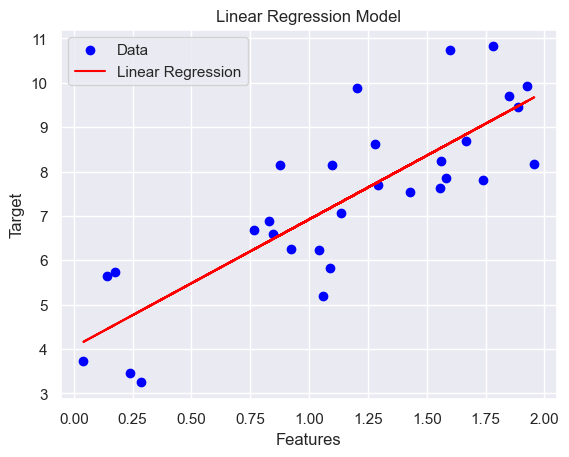

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(30, 1)  # Generate 100 random values between 0 and 2
y = 4 + 3 * X + np.random.randn(30, 1)  # Generate y values with noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression Model')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [68]:
X = data.drop(columns = 'charges', axis =1)
y = data['charges']


In [69]:
# spliting the data into Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)